<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana7/CuadraturaGaussiana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
import math
sym.init_printing(use_unicode=True)

In [123]:
deg = 10
Roots, Weights = np.polynomial.legendre.leggauss(deg)

In [124]:
Roots

array([-0.97390653, -0.86506337, -0.67940957, -0.43339539, -0.14887434,
        0.14887434,  0.43339539,  0.67940957,  0.86506337,  0.97390653])

In [125]:
Weights

array([0.06667134, 0.14945135, 0.21908636, 0.26926672, 0.29552422,
       0.29552422, 0.26926672, 0.21908636, 0.14945135, 0.06667134])

In [126]:
f = lambda x: np.sin(x)

In [127]:
# Debemos poner la regla de transformacion a un intervalo general
a = 0
b = np.pi
t = 0.5*(Roots*(b-a)+a+b)
I = 0.5*(b-a)*np.sum(Weights*f(t))
I

np.float64(2.0000000000000004)

In [128]:
integrate.quad(f,0,np.pi)[0]

2.0

In [129]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [130]:
F = x**3*y**2*sym.sin(x)
F

 3  2       
x ⋅y ⋅sin(x)

In [131]:
a = -4.
b = 4.
c = -1
d = 3.66

In [132]:
sym.integrate(F,(x,a,b),(y,c,d))

-188.103553828469

In [133]:
# La doble cuadratura
def f(x,y):
  return x**3*y**2*np.sin(x)

In [134]:
integrate.dblquad(f,c,d,a,b)

(-188.10355382846922, 2.1984304946957167e-08)

In [135]:
def GetIntegral(f,x,w):

  t1 = 0.5*((b-a)*x+a+b)
  t2 = 0.5*((d-c)*x+c+d)

  T1,T2 = np.meshgrid(t1,t2, indexing ='ij')

  #Mapa de cuadratura
  z = np.zeros((deg,deg))

  for i in range(len(t1)):
    for j in range(len(t1)):
      z[i,j] = w[i]*w[j]*f(t1[i],t2[j])

  I = np.sum(z)*(b-a)*(d-c)/4

  return I,z,T1,T2

In [136]:
I, z, T1, T2 = GetIntegral(f,Roots,Weights)
I

np.float64(-188.10355429960308)

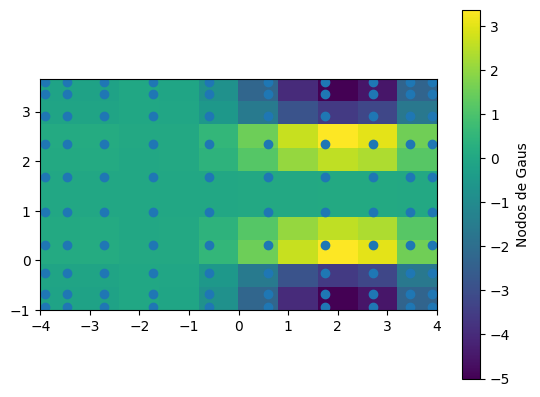

In [137]:
# Mostrando el mapa de cuadratura
plt.imshow(z, origin='lower', extent=[a,b,c,d], interpolation='nearest')
plt.colorbar(label='Nodos de Gaus')
plt.scatter(T1.ravel(),T2.ravel())

In [138]:
# Integramos de 0 to infty

In [139]:
Roots, Weights = np.polynomial.laguerre.laggauss(deg)
Roots

array([ 0.13779347,  0.72945455,  1.8083429 ,  3.4014337 ,  5.55249614,
        8.33015275, 11.84378584, 16.27925783, 21.99658581, 29.92069701])

In [150]:
Weights

array([3.08441116e-01, 4.01119929e-01, 2.18068288e-01, 6.20874561e-02,
       9.50151698e-03, 7.53008389e-04, 2.82592335e-05, 4.24931398e-07,
       1.83956482e-09, 9.91182722e-13])

In [151]:
F = sym.exp(-x)*sym.sin(x)
F

 -x       
ℯ  ⋅sin(x)

In [152]:
sym.integrate(F,(x,0.,sym.oo))

1/2

In [155]:
def f(x):
  return np.sin(x)

In [156]:
np.sum(Weights*f(Roots))

np.float64(0.5000002049648508)

In [160]:
def f(x):
  return np.exp(x)*x**3/(np.exp(x)-1)

In [161]:
np.sum(f(Roots)*Weights)

np.float64(6.493939967652104)

In [162]:
np.pi**4/15

6.493939402266828

In [163]:
def f(x):
  return np.exp(-x)*np.sin(2*x)

In [164]:
np.sum(f(Roots)*Weights)

np.float64(0.2499655510638305)

In [166]:
def f(x):
  return np.exp(-2*x)*np.sin(2*x)

In [167]:
integrate.quad(f,0,np.inf)[0]

0.25